In [1]:
import pandas as pd # извлекаем панду  
import os # для работы с файлами
import re # для регулярных выражений
import seaborn as sns # для таблиц
from statannotations.Annotator import Annotator
import matplotlib.pyplot as plt

In [2]:

path_dir = "F:\В работу!" # ссылка на самую верхнюю папку

In [3]:
def path_to_group_name(dir_adress): # ссылка на таблицу
    index_list = []
    # print(dir_adress)
    for index,value in enumerate(dir_adress): # проходим все символы в ссылке
        if value == "/":
            index_list.append(index)
    
    index_group_start,index_group_end = index_list[1],index_list[2] # вручную смотрим на индексы и вписываем
    index_sample_start,index_sample_end = index_list[2],index_list[3] #

    group_name = dir_adress[index_group_start+1:index_group_end] # выводим символы  между слешами из ссылки
    sample_name = dir_adress[index_sample_start+1:index_sample_end] # 
    return group_name,sample_name 


In [4]:
def Count_of_Area(correct_path,group_name,sample_name):
    islet_data_df_i = pd.read_csv(correct_path)
    data_i = islet_data_df_i[['ImageNumber','AreaShape_Area', 'Children_Islet_nucleus_Count','Children_Object_Glucagon_wo_double_stain_Count',
                              'Children_Object_Insulin_Glucagon_Nuclei_Count',
                              'Children_Object_Insulin_wo_double_stain_Count']].copy() # берем  колонки из большой таблицы
    data_i['Group'] = group_name # создали колонку "группа" и назвали ее символами, которые между слешами в первой части программы
    data_i['Sample'] = sample_name
    return(data_i)
    


In [5]:
empty_data = {'ImageNumber':[],'AreaShape_Area':[],'Children_Islet_nucleus_Count':[], 'Children_Object_Glucagon_wo_double_stain_Count':[], 
              'Children_Object_Insulin_Glucagon_Nuclei_Count' :[], 'Children_Object_Insulin_wo_double_stain_Count' :[],'Group':[],'Sample':[]} # это словарь. Заголовок и содержание
Number_of_nucleus_df = pd.DataFrame(empty_data) # сама таблица. пустая 



for address, dirs, files in os.walk(path_dir): # выдает строку с адресом последней папки(address), название всех папок(dirs), название файлов
    for file in files:
        if ".csv" in str(file):
            full_path = os.path.join(address, file) # добавляет файл к адресу
            correct_path = full_path.replace("\\","/")
            group_name,sample_name = path_to_group_name(correct_path)


            if "MyExpt_Islets" in str(file):
                # print(group_name,sample_name)
                Result = Count_of_Area(correct_path,group_name,sample_name)
                
                Number_of_nucleus_df = pd.concat([Number_of_nucleus_df,Result],axis=0)

Number_of_nucleus_df = Number_of_nucleus_df.rename(columns={'AreaShape_Area':'Area,px','Children_Islet_nucleus_Count':'Nucleus_all',
                                                             'Children_Object_Glucagon_wo_double_stain_Count':'Glucagon',  
                                                             'Children_Object_Insulin_Glucagon_Nuclei_Count': 'Insulin_Glucagon',
                                                              'Children_Object_Insulin_wo_double_stain_Count':'Insulin' })


Number_of_nucleus_df['Glucagon_part'] = Number_of_nucleus_df['Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100
Number_of_nucleus_df['Insulin_part'] = Number_of_nucleus_df['Insulin'] / Number_of_nucleus_df['Nucleus_all'] *100
Number_of_nucleus_df['Insulin_Glucagon_part'] = Number_of_nucleus_df['Insulin_Glucagon'] / Number_of_nucleus_df['Nucleus_all'] *100




In [6]:
writer = pd.ExcelWriter('C:\\Users\\Arteys\\Desktop\\Anya_work\\test.xlsx') # 

Number_of_nucleus_df.to_excel(writer) 
writer.save()

In [7]:
unique_group= Number_of_nucleus_df['Group'].unique()


pairs_1 = []
pairs_2 = []
pairs_3 = []
pairs_4 = []

for group in unique_group:
    pairs_1.append(((group),('Intact')))
    pairs_2.append(((group),('STZ-AFG')))
    pairs_3.append(((group),('30_days')))
    pairs_4.append(((group),('60_days')))
print(pairs_1,pairs_2,pairs_3,pairs_4)



[('STZ-AFG', 'Intact'), ('30_days', 'Intact'), ('60_days', 'Intact'), ('Intact', 'Intact')] [('STZ-AFG', 'STZ-AFG'), ('30_days', 'STZ-AFG'), ('60_days', 'STZ-AFG'), ('Intact', 'STZ-AFG')] [('STZ-AFG', '30_days'), ('30_days', '30_days'), ('60_days', '30_days'), ('Intact', '30_days')] [('STZ-AFG', '60_days'), ('30_days', '60_days'), ('60_days', '60_days'), ('Intact', '60_days')]


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Intact vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
60_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.642e-03 Stat=9.912e+00
30_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.343e-05 Stat=1.721e+01
STZ-AFG vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.030e-04 Stat=1.305e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STZ-AFG vs. STZ-AFG: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
STZ-AFG vs. 30_days: Kruskal-Wallis independent samples (pairwise between

(<AxesSubplot:xlabel='Group', ylabel='Glucagon_part'>,
  <statannotations.Annotation.Annotation at 0x227216f5c60>])

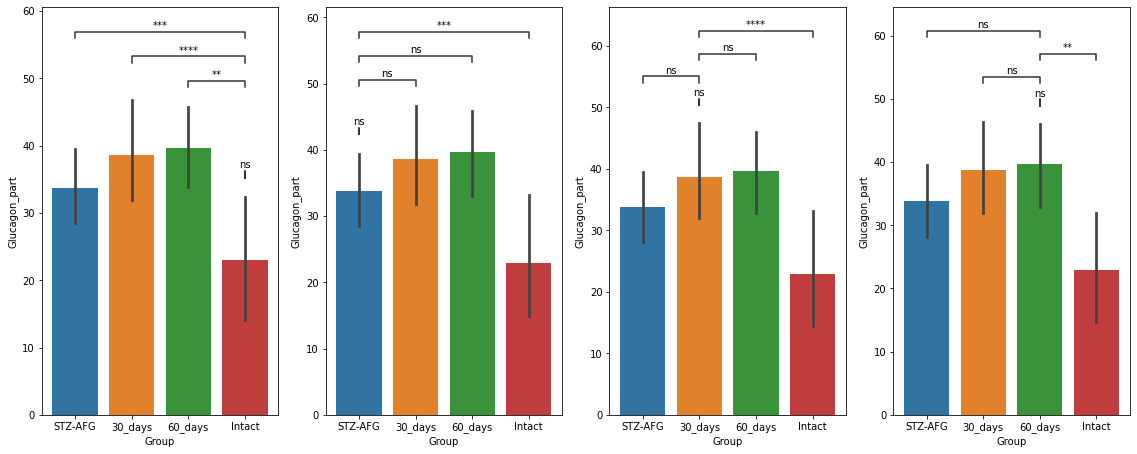

In [11]:
fig, axs = plt.subplots(ncols=4) #Количество колонок на панели рисунков
fig.set_size_inches(19.5, 7.5) #Размер панели с рисунками

sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[0])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[1])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[2])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part',ax=axs[3])

annotator = Annotator(axs[0], pairs_1, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[1], pairs_2, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[2], pairs_3, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[3], pairs_4, data=Number_of_nucleus_df, x = 'Group', y = 'Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Intact vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
60_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.086e-02 Stat=4.182e+00
30_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.440e-02 Stat=4.475e+00
STZ-AFG vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.109e-01 Stat=2.542e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STZ-AFG vs. STZ-AFG: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
STZ-AFG vs. 30_days: Kruskal-Wallis independent samples (pairwise between

(<AxesSubplot:xlabel='Group', ylabel='Insulin_part'>,
  <statannotations.Annotation.Annotation at 0x22721eb17e0>])

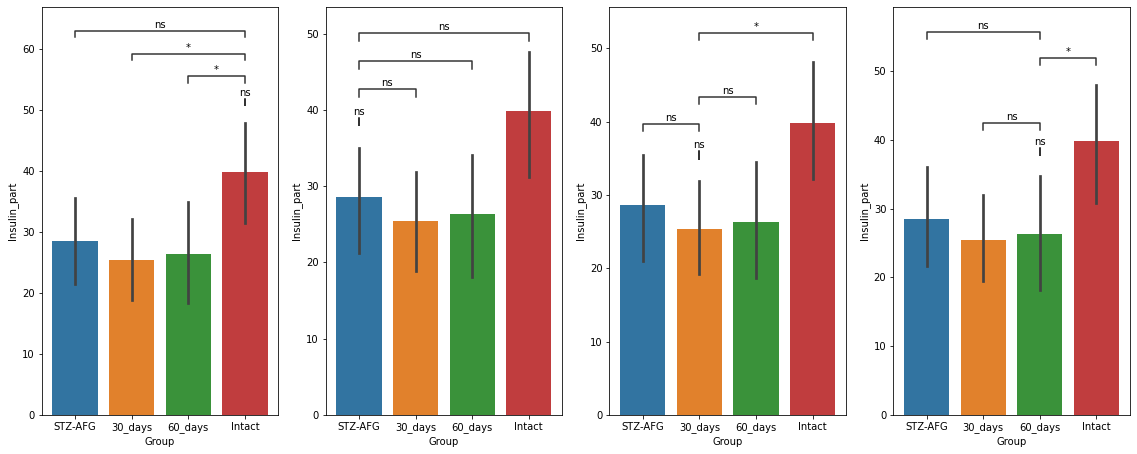

In [12]:
fig, axs = plt.subplots(ncols=4) #Количество колонок на панели рисунков
fig.set_size_inches(19.5, 7.5) #Размер панели с рисунками

sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[0])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[1])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[2])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_part',ax=axs[3])

annotator = Annotator(axs[0], pairs_1, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[1], pairs_2, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[2], pairs_3, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[3], pairs_4, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()



p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Intact vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
60_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.787e-01 Stat=2.331e-02
30_days vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.602e-01 Stat=1.972e+00
STZ-AFG vs. Intact: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.753e-01 Stat=3.138e-01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

STZ-AFG vs. STZ-AFG: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.000e+00 Stat=0.000e+00
STZ-AFG vs. 30_days: Kruskal-Wallis independent samples (pairwise between

(<AxesSubplot:xlabel='Group', ylabel='Insulin_Glucagon_part'>,
  <statannotations.Annotation.Annotation at 0x227229b3d00>])

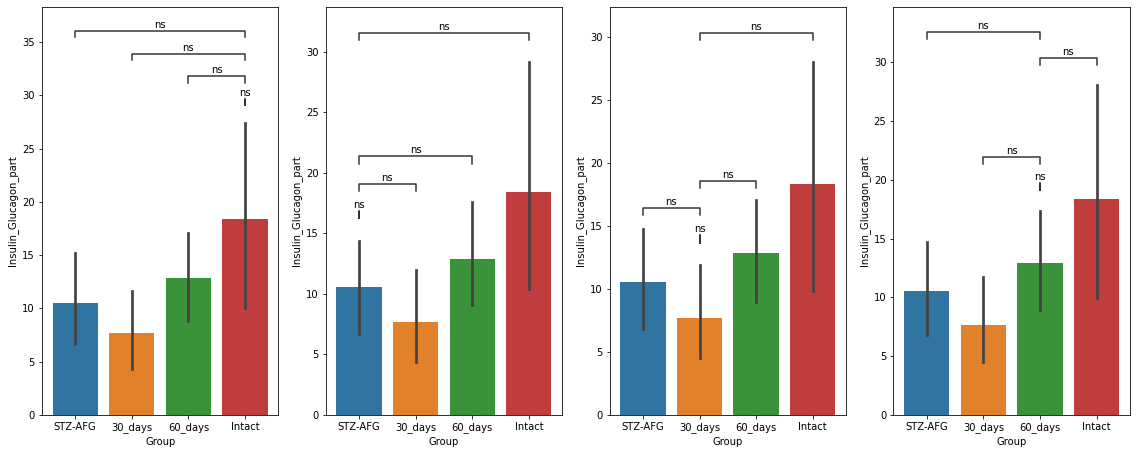

In [13]:
fig, axs = plt.subplots(ncols=4) #Количество колонок на панели рисунков
fig.set_size_inches(19.5, 7.5) #Размер панели с рисунками

sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[0])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[1])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[2])
sns.barplot(data = Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part',ax=axs[3])

annotator = Annotator(axs[0], pairs_1, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[1], pairs_2, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[2], pairs_3, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

annotator = Annotator(axs[3], pairs_4, data=Number_of_nucleus_df, x = 'Group', y = 'Insulin_Glucagon_part')
annotator.configure(test='Kruskal', text_format='star', loc='inside', comparisons_correction=None)

annotator.apply_and_annotate()

